In [1]:
#Figure 2 - October 2023
#Mean sensor evolution, GSM, AVW et NASA
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import glob

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
import statsmodels.api as sm

import cmocean
import colorcet as cc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

In [2]:
#Load median GSM sensors
path_out = '/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/Preproc_GRL/'
MER = xr.open_mfdataset(path_out + 'MER_median.nc')
SWF = xr.open_mfdataset(path_out + 'SWF_median.nc')

VIR = xr.open_mfdataset(path_out + 'VIR_median.nc')
VIR = VIR.sel(time = slice('1997-01','2021-12'))

MOD = xr.open_mfdataset(path_out + 'MOD_median.nc')
OLA = xr.open_mfdataset(path_out + 'OLA_median.nc')

In [13]:
#Load median merged products
#Cut at 2021-12
GCMEMS = xr.open_dataset(path_out + 'GCMEMS_median.nc')
GCMEMS = GCMEMS.sel(time = slice('1997-01','2021-12'))

MCMEMS = xr.open_dataset(path_out + 'MCMEMS_median.nc')
MCMEMS = MCMEMS.sel(time = slice('1997-01','2021-12'))

GSM = xr.open_dataset(path_out + 'GSM_median.nc')
GSM = GSM.sel(time = slice('1997-01','2021-12'))

AVW = xr.open_dataset(path_out + 'AVW_median.nc')
AVW = AVW.sel(time = slice('1997-01','2021-12'))

CCI = xr.open_dataset(path_out + 'CCI_median.nc')
CCI = CCI.sel(time = slice('1997-01','2021-12'))

YU = xr.open_dataset(path_out + 'YU_median.nc')
YU = YU.sel(time = slice('1997-01','2021-12'))

ds_list = list([GSM,AVW,GCMEMS,MCMEMS,CCI,YU])
dsout_list = list([GSM,AVW,GCMEMS,MCMEMS,CCI,YU])

In [36]:
name_list = ['Globcolour GSM','Globcolour AVW',
             'Globcolour CMEMS','Multiobs CMEMS',
             'OC-CCI','YU']
col_list = ['tab:cyan' ,'tab:green',
            'tab:orange','tab:blue',
            'black','grey']

#col_list = ['#999999', '#dede00',
#            '#377eb8', '#4daf4a',
#            '#f781bf', '#a65628', '#984ea3',
#            '#e41a1c','#ff7f00']

In [37]:
#Manual trend decomposition
f = 0.1
#Yu et al 2023
i = 0
for i in np.arange(len(ds_list)):
    dsi = ds_list[i]
    season = dsi.groupby('time.month').mean(dim='time').chloro_qua
    monthly = dsi.groupby('time.month')
    dsi = dsi.assign(variables={"chl_deseason": (('time'), (monthly - monthly.mean(dim='time')).chloro_qua.data)})
    dsi = dsi.assign(variables={"chl_trend": (('time'), sm.nonparametric.lowess(dsi.chl_deseason, dsi.time, frac=f)[:,1].data)})
    dsi = dsi.assign(variables={"chl_raw_trend": (('time'), sm.nonparametric.lowess(dsi.chloro_qua, dsi.time, frac=f)[:,1].data)})
    dsi = dsi.assign(variables={"name": name_list[i]})
    dsout_list[i] = dsi

Globcolour GSM
Globcolour AVW
Globcolour CMEMS
Multiobs CMEMS
OC-CCI
YU


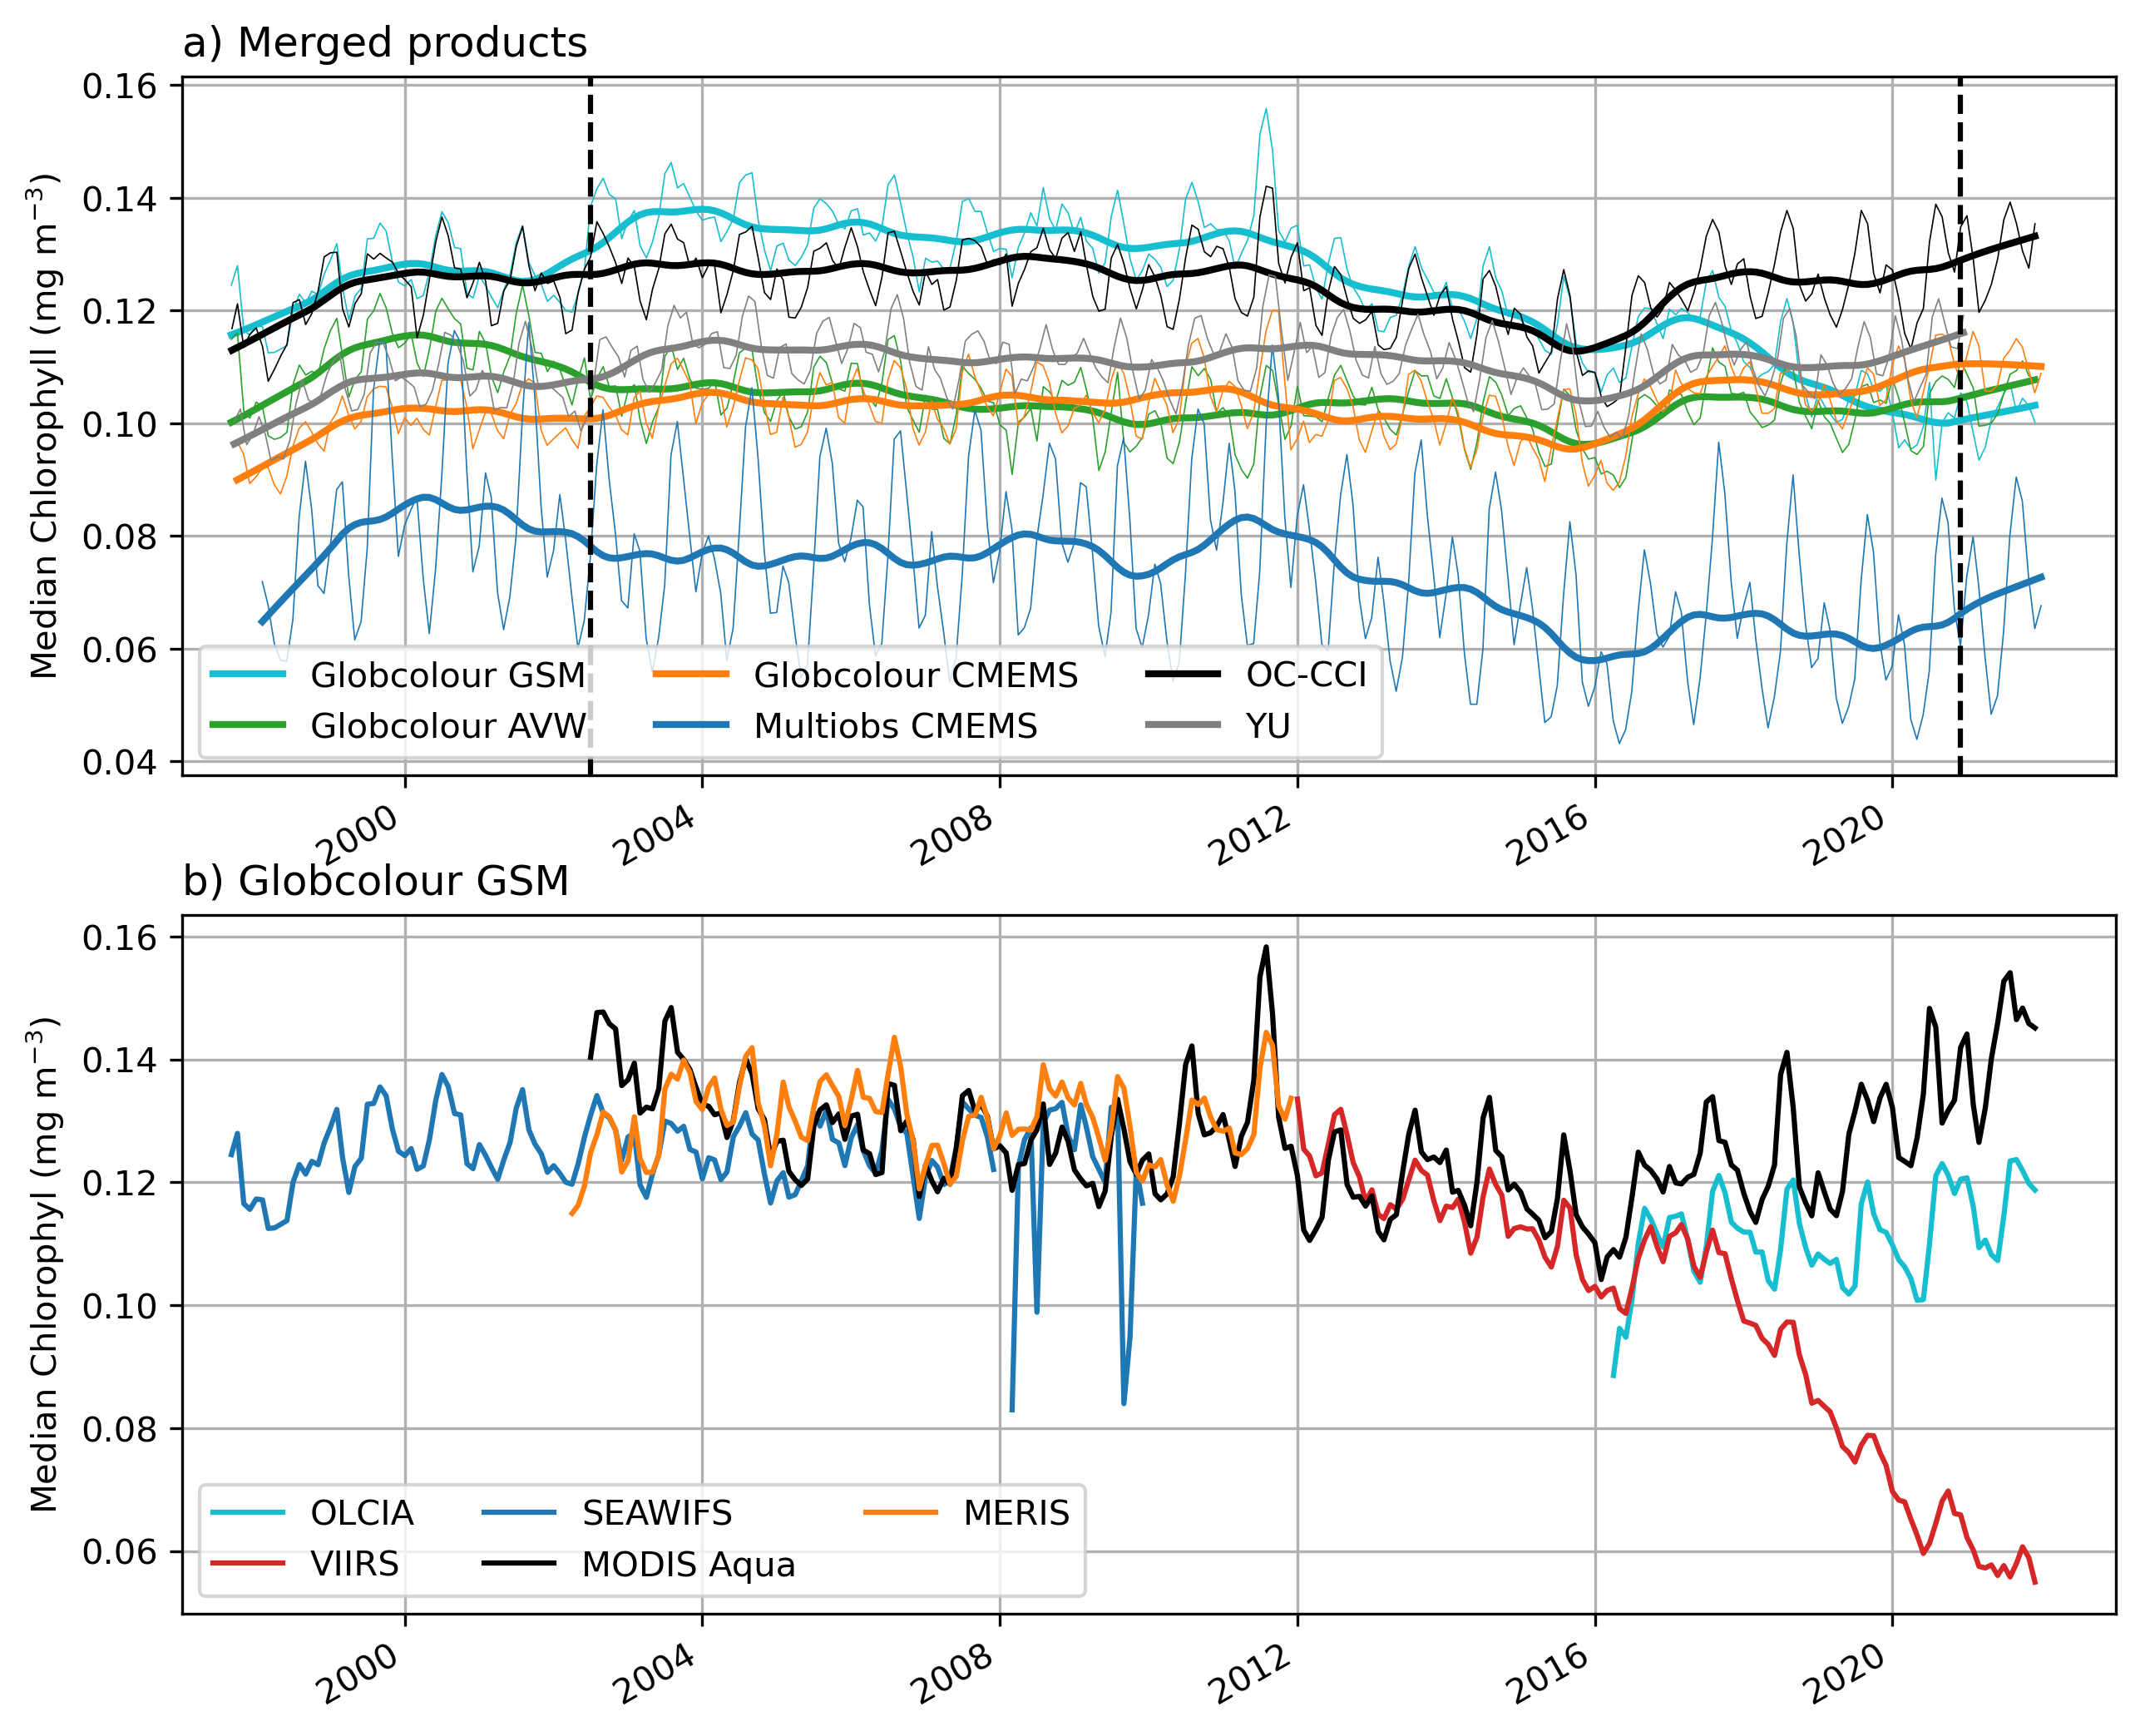

In [38]:
fig, ((ax1, ax2)) = plt.subplots(2,1, figsize=(10,8), dpi=300,)
l1 = 0.4
l2 = 2
for i in np.arange(len(ds_list)):
    dsout_list[i].chloro_qua.plot(c = col_list[i],linewidth = l1,ax = ax1) #
    dsout_list[i].chl_raw_trend.plot(color = col_list[i],label = dsout_list[i].name.data,linewidth = l2,ax = ax1) #
    print(dsout_list[i].name.data)
ax1.set_title("a) Merged products",loc = 'left')
ax1.grid()
ax1.legend(loc = "lower left",ncol = 3)
#ax1.set_ylim([0.12,0.26])
ax1.set_xlim([pd.to_datetime('1997-01-01'),pd.to_datetime('2023-01-01')])
ax1.set_xlabel("")
ax1.set_ylabel('Median Chlorophyll (mg m$^{-3}$)')
d1 = '2002-07'
d2 = '2020-12'
ax1.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax1.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')

#GSM
OLA.chloro_qua.plot(label = "OLCIA",ax = ax2, color = 'tab:cyan')
VIR.chloro_qua.plot(label = "VIIRS",ax = ax2, color = 'tab:red')
SWF.chloro_qua.plot(label = "SEAWIFS",ax = ax2, color = 'tab:blue')
MOD.chloro_qua.plot(label = "MODIS Aqua",ax = ax2, color = 'black')
MER.chloro_qua.plot(label = "MERIS",ax = ax2, color = 'tab:orange')
ax2.legend(ncol = 3)
ax2.set_title('b) Globcolour GSM',loc = 'left')
ax2.grid()
ax2.set_xlabel("")
ax2.set_ylabel('Median Chlorophyl (mg m$^{-3}$)')
ax2.set_xlim([pd.to_datetime('1997-01-01'),pd.to_datetime('2023-01-01')])
#ax2.xaxis.set_tick_params(labelbottom=False)
#ax2.set_xticklabels(['',2000,2004,'','',2016,2020,2024])

plt.savefig('Figure_GRL/Fig2_colorblind.png', bbox_inches='tight')

In [14]:
col_list

['#377eb8',
 '#ff7f00',
 '#4daf4a',
 '#f781bf',
 '#a65628',
 '#984ea3',
 '#999999',
 '#e41a1c',
 '#dede00']

In [78]:
col_list